Written by: Konstantinos Perros
AEM : 3713

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The images are 28x28 pixels depicting numbers from 0 to 9, with 60000 total training images and 10000 total testing images.

In [42]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist


In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Depicts the number of images as well as their dimensions

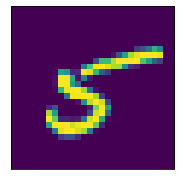

5


In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(3, 3))
plt.imshow(x_train[145])
plt.xticks([])
plt.yticks([])
plt.show()
print(y_train[145])

Depicts and plots a random image from the dataset to validate usage.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import NearestCentroid

Import the KNN and Nearest Centroid calssifiers from the scikit-learn library

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

x_train_knn1 = x_train.reshape(60000, 784)
x_test_knn1 = x_test.reshape(10000, 784)

knn.fit(x_train_knn1, y_train)
print(knn.score(x_test_knn1, y_test))

0.9691


Reshape the data for usage in the classifier for 1 neighbour, run the classifier and present the accuracy after testing with the initial data.

(Time taken: 37s)

In [46]:
knn = KNeighborsClassifier(n_neighbors=3)

x_train_knn3 = x_train.reshape(60000, 784)
x_test_knn3 = x_test.reshape(10000, 784)

knn.fit(x_train_knn3, y_train)
print(knn.score(x_test_knn3, y_test))

0.9705


Reshape the data for usage in the classifier for 3 neighbours, run the classifier and present the accuracy after testing with the initial data.

(Time taken: 46s)

In [47]:
clf = NearestCentroid()

x_train_clf = x_train.reshape(60000, 784)
x_test_clf = x_test.reshape(10000, 784)
clf.fit(x_train_clf, y_train)
NearestCentroid()
print(clf.score(x_test_clf,y_test))


0.8203


Reshape the data for usage in the classifier for finding the nearest centroids, run the classifier and present the accuracy after testing with the initial data.

(Time taken: 1s)

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

x_train_knn5 = x_train.reshape(60000, 784)
x_test_knn5 = x_test.reshape(10000, 784)

knn.fit(x_train_knn5, y_train)
print(knn.score(x_test_knn5, y_test))

0.9688


Reshape the data for usage in the classifier for 5 neighbours, run the classifier and present the accuracy after testing with the initial data.

(Time taken: 39s)

In [49]:
knn = KNeighborsClassifier(n_neighbors=7)

x_train_knn7 = x_train.reshape(60000, 784)
x_test_knn7 = x_test.reshape(10000, 784)

knn.fit(x_train_knn7, y_train)
print(knn.score(x_test_knn7, y_test))

0.9694


Reshape the data for usage in the classifier for 7 neighbours, run the classifier and present the accuracy after testing with the initial data.

(Time taken: 41)

In [2]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [14]:
x_train_model1 = x_train.reshape(60000,784)
x_test_model1 = x_test.reshape(10000,784)


we reshape the train and test data from 2 dimensional images in 1 dimensional arrays to 1 dimensional image data from the pixels of the images in 1 dimensional arrays

In [15]:
model = Sequential()
model.add(Dense(32, input_shape=x_train_model1[0].shape))

Adding Sequential() defines a neuron network model that follows the classic sequential layer strucutre.

We then add a dense layer to the model, which defines simple neurons

input_shape defines the input type (more or less the pixel size and dimensions) of the neural network

32 defines that the first layer (after the input) will have 32 neurons. It is interchangeable.

Dense defiens the type of layer and adds to the network a dense type of layer which means the neurons do not run convolutions and take the general weights from the previous layers till the current layer and also share these weights to the next layers. The weights are given through back propagation run automatically.

(every neuron is a filter in which when we run a convolution with its input the result is an image)

In [16]:
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

In the same sense we add 3 sequential layers of 64 neurons for the first 2 and 32 for the third. we do not need to add more layers for this dataset but we will add more to see through trial and error which neuron network type and layer we gain the best results. The results show accuracy of the network for image classification.

The starting numbers are experimental

We move through layers by multiplying the input with respective weights to define each neuron.
Each neuron has a defining number that comes from multiplying the input with respective weights from previous and current layers.

Layers are connected through synapses between neurons of different layers

When every synapse from the previous layer arrives on each neuron from the new layer, we multiply said synapses with each respective synapse's weight, The multiplication occurs inside the neuron. 
[image1.png]

The activation module defines that after the multiplication process (the x values with the w weights) we take the results and input them on said module. In this situation it is defined as the relu function which states:
y=x, for x > 0
y=0, for x <= 0

we do this so that we can assign values to each neuron to see how important it is on the layer. For example in relu a neuron with a not so important x (below 0) takes the value 0 on itself assigningi t as non-important for the network, whereas others continue as normal.

 We use simple relu because it runs and works fine without problems after trials and errors.

In [17]:
model.add(Dense(10, activation = 'softmax'))

A the end of the network we add a final layer of 10 neurons because mnist has 10 classes as a result of each image classification (from 0 through 9) and each neuron contains a percentage that represents the chance said image to be classifies on the respective class (0 through 9). 

For example if the highest value neruon in the final layer is classified as 6, the network predicts the input as being number 6.

[image2.png]
(we used to use sigmoid in the past and we could use it on the current network, but it is not used since relu has given us better results through trial and error)
We use softmax [image3.png] which is a complex activation function that currently through trial and error has empirically given us the highest multinomial probability distribution results. Said results are used on the final layer to give us values from 0 through 1 as a percentage on each neuron in which a classification occurs succesfully.

In [18]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['sparse_categorical_accuracy'])

(straight answer as to why specific methods are used, is because it has been tried and used and works).

compilation defines the loss function, optimizer and metrics for running the network.

after running the network and fitting it (see beloew on new text) the results at the end after all the layers are random. Inside the neuron network nobody really knows what happens as it is getting trained (it is impossible to know). 

Through the loss function we define how accurate (and wrong) the predictions of the network are. (comparison between outputs of the x_train data and the y_train result data)
We use crossentropy experimentally.

The metrics define the type of data we use for the accuracy of the outcomes. We use sparse categrical accuracy for ease of use.

The optimizer function takes the loss function and tries to train the network according to the loss. Adam is an algorithm that tries to find the minimum loss. 

In [12]:
history = model.fit(x_train_model1, y_train, batch_size=32, epochs = 5, validation_data=(x_test_model1, y_test),shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8951 - sparse_categorical_accuracy: 0.7998 - val_loss: 0.3937 - val_sparse_categorical_accuracy: 0.9001
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2891 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.3004 - val_sparse_categorical_accuracy: 0.9180
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2174 - sparse_categorical_accuracy: 0.9402 - val_loss: 0.2091 - val_sparse_categorical_accuracy: 0.9436
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1764 - sparse_categorical_accuracy: 0.9495 - val_loss: 0.1767 - val_sparse_categorical_accuracy: 0.9537
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1578 - sparse_categorical_accuracy: 0.9550 - val_loss: 0.1760 - val_sparse_categorical_accuracy: 0.9528


We fit the data from the train data set (x_train) and the expected results (y_train).
Fit is the function that trains the data, in which it takes the input and tries through said compilation of the network to achieve best weights for most accurate results. It uses back-propagation

Epochs define the number of repetitions.

Batch size defines th number of parallel runs we can have on a network for faster results, since it can be paralellized.

validation data defines testing data on the network after it has been trained. A network can be trained an infinite number of times on a train data but only through test data can we truly find the accuracy of the training, (x_test defines the data to be tested y_test the expected results).

shuffle defines whether we want to shuffle the train data or not (and test data) so that the network does not leanr (or does) the order in which the data is given (so it cannot predict the same numbers without being trained).

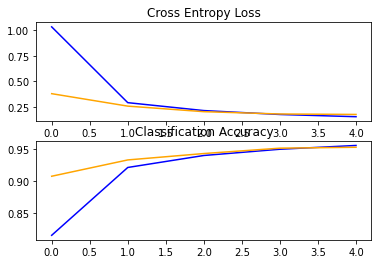

In [ ]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['sparse_categorical_accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_sparse_categorical_accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()
pyplot.close()

Through the results we can observe the loss radically declining on the first iteration and then gradually becoming lower, and the accuracy greatly becoming better after 1 iteration and gradually becoming better.

The results took around 26s.

We can see the results in the above plot. Loss is the first and accuracy the last. (orange shows test data and blue the train data)
We do not observe any overtraining with the current epoch count (which would lower the accuracy)

we can now test for a different amount of neurons, layers, and epochs to observe how the results differ.

In [53]:
x_train_model1_1 = x_train.reshape(60000,784)
x_test_model1_1 = x_test.reshape(10000,784)
model1_1 = Sequential()
model1_1.add(Dense(32, input_shape=x_train_model1[0].shape))
model1_1.add(Dense(64, activation='relu'))
model1_1.add(Dense(64, activation='relu'))
model1_1.add(Dense(128, activation='relu'))
model1_1.add(Dense(64, activation='relu'))
model1_1.add(Dense(64, activation='relu'))
model1_1.add(Dense(32, activation='relu'))
model1_1.add(Dense(10, activation = 'softmax'))
model1_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['sparse_categorical_accuracy'])

history1_1 = model1_1.fit(x_train_model1_1, y_train, batch_size=32, epochs = 10, validation_data=(x_test_model1_1, y_test),shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5081 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.2416 - val_sparse_categorical_accuracy: 0.9305
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2201 - sparse_categorical_accuracy: 0.9385 - val_loss: 0.2084 - val_sparse_categorical_accuracy: 0.9406
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1741 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.1640 - val_sparse_categorical_accuracy: 0.9527
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1502 - sparse_categorical_accuracy: 0.9578 - val_loss: 0.1542 - val_sparse_categorical_accuracy: 0.9602
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1295 - sparse_categorical_accuracy: 0.9637 - val_loss: 0.1465 - val_sparse_categorical_accuracy: 0.9623
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1198 - spar

In this experiment we will create a network with more layers and higher neuron count as well with more epochs as an experiment for better results. Obviously since the training passes though more neurons which equals higher multiplication count as well as layers, each epoch takes more time. 
(Time taken: 1m)


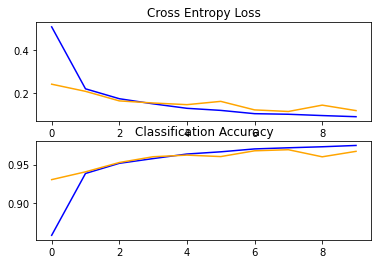

In [55]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history1_1.history['loss'], color='blue', label='train')
pyplot.plot(history1_1.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history1_1.history['sparse_categorical_accuracy'], color='blue', label='train')
pyplot.plot(history1_1.history['val_sparse_categorical_accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()
pyplot.close()

We can observe something interesting from the results. We can reach higher accuracies faster than the initial network on the train data and also observe some overtraining by the 8th epoch. The network has learnt the pattern of the training data itself and so the test data results in accuracy gradually begin to worsen even though the accuracy for the training set increases.

In [ ]:
x_train_model2 = x_train.reshape(60000, 28, 28, 1)
x_test_model2 = x_test.reshape(10000, 28, 28, 1)


model2 = Sequential()
model2.add(Conv2D(16, (2,2), activation = 'relu',padding="SAME", input_shape = x_train_model2[0].shape))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(32, (2,2), activation = 'relu',padding="SAME"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.1))
model2.add(Flatten())
model2.add(Dense(10, activation = 'softmax'))
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['sparse_categorical_accuracy'])

We can now make a second neural network, which instead of dense layers, it uses 2d image convolution layers. As such we can observe the differences between a simple layer (like a dense layer) and a convolution layer, which uses convolutions on the input photos, which use some special characteristics the images have and finds certain unique patterns that can be used for better training.

(for example the netwrok may find unique curves that define a certain number within an image for better classification) 

other that that the layer additions are the same. The kernel is a 2x2 array (which is defined as 2,2) in which the convolution is applied.
We add a padding so that we can add extra pixels around an image so that the kernel is used correctly on every pixel.
These extra pixels have the assigned value of their nearest pixel, as defined by the "SAME" module.

Flatten() essentially transforms each multidimensional output of each layer into a monodimensional array as input for the next layer.

Dropout helps with overtraining as it deletes certain synapses that burden the network and make it repetitive. In other words it makes the weights of random weights inside a layer to be deleted. We set it to 10% of all results currently experimentally (0.1)

we reshape the data so they get represented as colored images (last value is the rgb value)

In [ ]:
history2 = model2.fit(x_train_model2, y_train, batch_size=32, epochs = 5, validation_data=(x_test_model2, y_test),shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.5925 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.1217 - val_sparse_categorical_accuracy: 0.9642
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1564 - sparse_categorical_accuracy: 0.9522 - val_loss: 0.0730 - val_sparse_categorical_accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.0673 - val_sparse_categorical_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0856 - sparse_categorical_accuracy: 0.9743 - val_loss: 0.0471 - val_sparse_categorical_accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.0759 - val_sparse_categorical_accuracy: 0.9760


The results are really good and very accurate, although obviously they take a lot of time. We do not need to apply PCA or FFT since convoluton applies equally as good or even better features

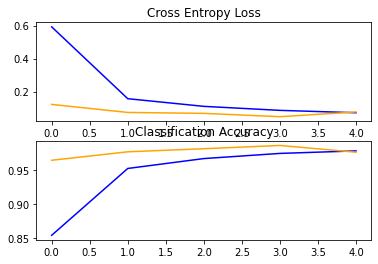

In [ ]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history2.history['loss'], color='blue', label='train')
pyplot.plot(history2.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history2.history['sparse_categorical_accuracy'], color='blue', label='train')
pyplot.plot(history2.history['val_sparse_categorical_accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()
pyplot.close()

The results are really good, so much so that in just 5 epochs we can observe overtraining in the final repetition, even though we added ropout to the mix and fewer layers than the dense model.

In [34]:
x_train_model2_1 = x_train.reshape(60000, 28, 28, 1)
x_test_model2_1 = x_test.reshape(10000, 28, 28, 1)


model2_1 = Sequential()
model2_1.add(Conv2D(16, (2,2), activation = 'relu',padding="SAME", input_shape = x_train_model2_1[0].shape))
model2_1.add(MaxPooling2D(pool_size=(2,2)))
model2_1.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME"))
model2_1.add(MaxPooling2D(pool_size=(2,2)))
model2_1.add(Conv2D(128, (2,2), activation = 'relu',padding="SAME"))
model2_1.add(MaxPooling2D(pool_size=(2,2)))
model2_1.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME"))
model2_1.add(MaxPooling2D(pool_size=(2,2)))
model2_1.add(Dropout(0.4))
model2_1.add(Flatten())
model2_1.add(Dense(10, activation = 'softmax'))
model2_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['sparse_categorical_accuracy'])

history2_1 = model2_1.fit(x_train_model2_1, y_train, batch_size=32, epochs = 10, validation_data=(x_test_model2_1, y_test),shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.8167 - sparse_categorical_accuracy: 0.7350 - val_loss: 0.1126 - val_sparse_categorical_accuracy: 0.9688
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2473 - sparse_categorical_accuracy: 0.9216 - val_loss: 0.0818 - val_sparse_categorical_accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1510 - sparse_categorical_accuracy: 0.9542 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1188 - sparse_categorical_accuracy: 0.9649 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0961 - sparse_categorical_accuracy: 0.9720 - val_loss: 0.0457 - val_sparse_categorical_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.

We will conduct another convolution with 2D image on a 2 by 2 kernel as an experiment but with higher neuron count and much higher dropout percentage (40%). We wil lalso increase the epochs to 10. This will greatly increase the time taken (final time taken: 10 m)

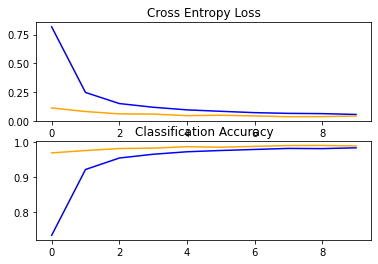

In [35]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history2_1.history['loss'], color='blue', label='train')
pyplot.plot(history2_1.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history2_1.history['sparse_categorical_accuracy'], color='blue', label='train')
pyplot.plot(history2_1.history['val_sparse_categorical_accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()
pyplot.close()

We can observe that the network rarely gets overtrained due to high dropout rate and the overall accuracy is increased due to the incresed factors as stated above, with maximum accuracy of 99%.

In [38]:
x_train_model2_2 = x_train.reshape(60000, 28, 28, 1)
x_test_model2_2 = x_test.reshape(10000, 28, 28, 1)


model2_2 = Sequential()
model2_2.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME", input_shape = x_train_model2_2[0].shape))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Conv2D(128, (2,2), activation = 'relu',padding="SAME"))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Conv2D(128, (2,2), activation = 'relu',padding="SAME"))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME"))
model2_2.add(MaxPooling2D(pool_size=(2,2)))
model2_2.add(Dropout(0.4))
model2_2.add(Flatten())
model2_2.add(Dense(10, activation = 'softmax'))
model2_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['sparse_categorical_accuracy'])

history2_2 = model2_2.fit(x_train_model2_2, y_train, batch_size=32, epochs = 5, validation_data=(x_test_model2_2, y_test),shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 149s 79ms/step - loss: 0.7241 - sparse_categorical_accuracy: 0.7732 - val_loss: 0.0923 - val_sparse_categorical_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.2079 - sparse_categorical_accuracy: 0.9374 - val_loss: 0.0587 - val_sparse_categorical_accuracy: 0.9817
Epoch 3/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1418 - sparse_categorical_accuracy: 0.9564 - val_loss: 0.0536 - val_sparse_categorical_accuracy: 0.9849
Epoch 4/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.1113 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.0519 - val_sparse_categorical_accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0917 - sparse_categorical_accuracy: 0.9718 - val_loss: 0.0439 - val_sparse_categorical_accuracy: 0.9871


Since the 40% percentage seems to yield pretty good results, we will only increase the neuron count and leave the dropout rate the same. Since this process wil ltake a lot of time we will initially observe results for only 5 epochs instead of 10 as previously. (Final time taken: 14m)

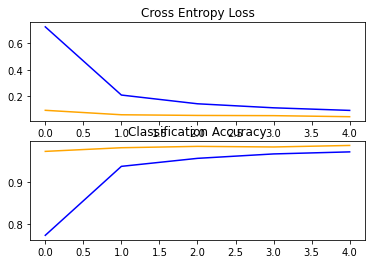

In [39]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history2_2.history['loss'], color='blue', label='train')
pyplot.plot(history2_2.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history2_2.history['sparse_categorical_accuracy'], color='blue', label='train')
pyplot.plot(history2_2.history['val_sparse_categorical_accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()
pyplot.close()

As expected, we observe the results from the previous test to be reached within only 5 epochs, but with a much higher neuron count the final time taken is higher than previously. Nevertheless it is easy to determine that a higher neuron count increases the accuracy greatly and the dropout rate at 40% (with a little wiggle room) is really good at preventing overtraining. (Highest accuracy: 98.7%)

In [40]:
x_train_model2_3 = x_train.reshape(60000, 28, 28, 1)
x_test_model2_3 = x_test.reshape(10000, 28, 28, 1)


model2_3 = Sequential()
model2_3.add(Conv2D(16, (2,2), activation = 'relu',padding="SAME", input_shape = x_train_model2_3[0].shape))
model2_3.add(MaxPooling2D(pool_size=(2,2)))
model2_3.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME"))
model2_3.add(MaxPooling2D(pool_size=(2,2)))
model2_3.add(Conv2D(64, (2,2), activation = 'relu',padding="SAME"))
model2_3.add(MaxPooling2D(pool_size=(2,2)))
model2_3.add(Conv2D(32, (2,2), activation = 'relu',padding="SAME"))
model2_3.add(MaxPooling2D(pool_size=(2,2)))
model2_3.add(Dropout(0.7))
model2_3.add(Flatten())
model2_3.add(Dense(10, activation = 'softmax'))
model2_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='Adam', metrics=['sparse_categorical_accuracy'])

history2_3 = model2_3.fit(x_train_model2_3, y_train, batch_size=32, epochs = 20, validation_data=(x_test_model2_3, y_test),shuffle=True)

Epoch 1/20
1875/1875 [==============================] - 59s 30ms/step - loss: 2.3581 - sparse_categorical_accuracy: 0.1626 - val_loss: 2.0154 - val_sparse_categorical_accuracy: 0.2153
Epoch 2/20
1875/1875 [==============================] - 54s 29ms/step - loss: 2.1094 - sparse_categorical_accuracy: 0.1819 - val_loss: 1.8115 - val_sparse_categorical_accuracy: 0.2990
Epoch 3/20
1875/1875 [==============================] - 54s 29ms/step - loss: 1.9752 - sparse_categorical_accuracy: 0.2345 - val_loss: 1.5607 - val_sparse_categorical_accuracy: 0.4115
Epoch 4/20
1875/1875 [==============================] - 55s 29ms/step - loss: 1.7333 - sparse_categorical_accuracy: 0.3194 - val_loss: 1.2351 - val_sparse_categorical_accuracy: 0.5548
Epoch 5/20
1875/1875 [==============================] - 54s 29ms/step - loss: 1.5135 - sparse_categorical_accuracy: 0.4102 - val_loss: 0.8785 - val_sparse_categorical_accuracy: 0.7155
Epoch 6/20
1875/1875 [==============================] - 54s 29ms/step - loss: 1.

We will conduct an experiment now with the number of neurons from the first example of 2D convolution but with higher drop rate, not only to prevent overtraining, but to confuse the network too much and observe the results. Since all the previous tests had lower dropout rates we will initialize a starting rate of 70%. We will add more epochs to see the results gradually. (Final time taken: )

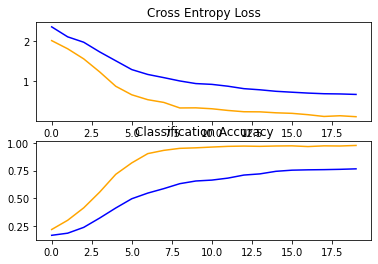

In [41]:
# plot loss
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history2_3.history['loss'], color='blue', label='train')
pyplot.plot(history2_3.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history2_3.history['sparse_categorical_accuracy'], color='blue', label='train')
pyplot.plot(history2_3.history['val_sparse_categorical_accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()
pyplot.close()

Initially we wanted to confuse the network too much with a high dropout rate but we observe that the network learns from its mistakes faster than the shuffling of the inputs are randomized. Although this psoes a difficulty initially for the network to achieve a high accuracy on the training data, not only does it achieve very high accuracies on the test data but afterwards overcomes this difficulty and gets higher accuracies on the training data itself. And since the dropout rate is high, overtraining is noexistent. This can be truly described as fascinating.

We observe that even a failed classification attempt given enough time yields high accuracy.

We deduce as a result that a high dropout rate as well as high neuron count for more epochs will yield great results in the long run although the time needed will be huge as well.

As a final comparison within results we have:

knn1: 96.91%

knn3: 97.07%

knn5: 96.88%

knn7: 96.94%

clf: 82.03%

model1: 95.37% (overtrained afterwards on 5th epoch)

model1_1: 96.93% (overtrained afterwards on 8th epoch)

model2: 98.59% (overtrained afterwards on 5th epoch)

model2_1: 98.99% (slightly overtrained afterwards due to dropout on final epoch)

model2_2: 98.71%

model2_3: 97.74%
